<a href="https://colab.research.google.com/github/VISHNUCHARAN27/MACHINE-LEARNING/blob/master/Forest_cover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!unzip forest-cover-type-prediction.zip

Archive:  forest-cover-type-prediction.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of forest-cover-type-prediction.zip or
        forest-cover-type-prediction.zip.zip, and cannot find forest-cover-type-prediction.zip.ZIP, period.


In [0]:
import pandas as pd
df=pd.read_csv('/content/train.csv')
df

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5
5,6,2579,132,6,300,-15,67,230,237,140,...,0,0,0,0,0,0,0,0,0,2
6,7,2606,45,7,270,5,633,222,225,138,...,0,0,0,0,0,0,0,0,0,5
7,8,2605,49,4,234,7,573,222,230,144,...,0,0,0,0,0,0,0,0,0,5
8,9,2617,45,9,240,56,666,223,221,133,...,0,0,0,0,0,0,0,0,0,5
9,10,2612,59,10,247,11,636,228,219,124,...,0,0,0,0,0,0,0,0,0,5


SELECTING THE BEST COLUMNS

In [0]:
q=df.drop(['Id','Cover_Type'],axis='columns')
t=df['Cover_Type']

In [0]:
print(q.shape)
print(q.count())


(15120, 54)
Elevation                             15120
Aspect                                15120
Slope                                 15120
Horizontal_Distance_To_Hydrology      15120
Vertical_Distance_To_Hydrology        15120
Horizontal_Distance_To_Roadways       15120
Hillshade_9am                         15120
Hillshade_Noon                        15120
Hillshade_3pm                         15120
Horizontal_Distance_To_Fire_Points    15120
Wilderness_Area1                      15120
Wilderness_Area2                      15120
Wilderness_Area3                      15120
Wilderness_Area4                      15120
Soil_Type1                            15120
Soil_Type2                            15120
Soil_Type3                            15120
Soil_Type4                            15120
Soil_Type5                            15120
Soil_Type6                            15120
Soil_Type7                            15120
Soil_Type8                            15120
Soil_Type9          

SelectKbest cannot be used because it can accept only non negative values

In [0]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

best_features=SelectKBest(score_func=chi2,k=15)
fit=best_features.fit(q,t)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(q.columns)

fearture_scores=pd.concat([dfcolumns,dfscores],axis='columns')
fearture_scores.columns=['Feature','Score']
print(feature_scores.nlargest(15,'Score'))

ValueError: ignored

# **EXTRA TREE CLASSIFIER can be used for feature selection**

REFER 

https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

https://scikitlearn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html



[1.63346967e-01 5.00105384e-02 4.09996041e-02 5.84050143e-02
 4.98957635e-02 7.96442134e-02 4.86270889e-02 4.46453752e-02
 4.50610958e-02 6.69293363e-02 2.17232423e-02 4.07637656e-03
 1.91334115e-02 6.00289586e-02 2.19293406e-03 8.89930590e-03
 2.37689254e-02 1.58191381e-02 1.70231633e-03 3.92992448e-03
 0.00000000e+00 1.34605399e-05 2.10451909e-04 3.07707481e-02
 4.18357221e-03 6.52684930e-03 7.94832888e-03 2.07866526e-03
 0.00000000e+00 1.70503456e-03 9.66502010e-03 1.16765783e-03
 8.16648488e-04 2.26956722e-03 4.19953845e-04 7.99754162e-03
 7.28665866e-03 3.86455924e-03 3.23091374e-05 7.77654116e-04
 2.84692296e-04 2.04332120e-04 7.32194569e-03 1.17514534e-02
 3.46454084e-03 5.88926739e-03 4.55448598e-03 5.13713069e-04
 3.87515580e-03 1.90893899e-04 1.12811600e-03 2.64812967e-02
 2.32796195e-02 1.44862760e-02]
Elevation                             0.163347
Aspect                                0.050011
Slope                                 0.041000
Horizontal_Distance_To_Hydrology  

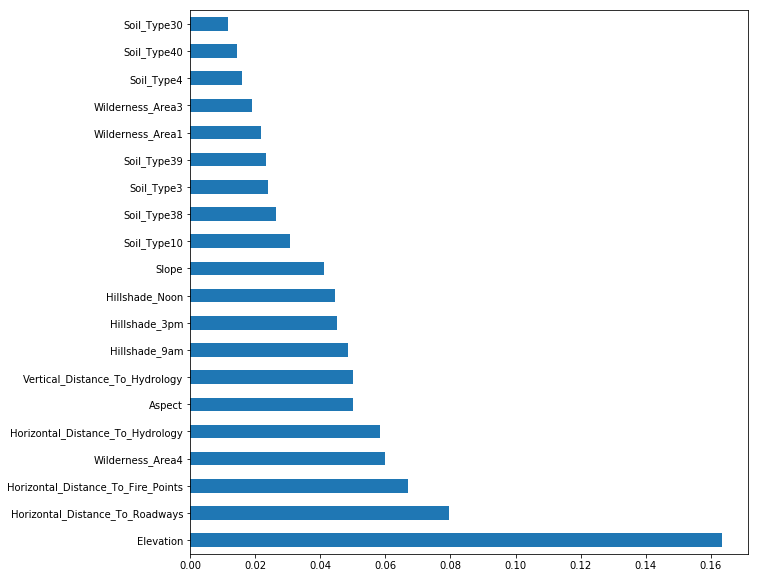

In [0]:
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators=500) #n_estimators is not necessary but can be used to improve the number of trees in the forest
model.fit(q,t)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization

plt.figure(figsize=(10,10))
feat_importances=pd.Series(model.feature_importances_, index=q.columns)
print(feat_importances)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

[1.56177441e-01 5.24938252e-02 4.19165384e-02 5.75857530e-02
 4.83942113e-02 7.62676858e-02 4.62608694e-02 4.56835081e-02
 4.62722190e-02 6.49989977e-02 1.99694716e-02 6.18392816e-03
 2.12198619e-02 6.62732254e-02 2.97924198e-03 9.91368393e-03
 1.62455399e-02 1.49999188e-02 2.01559318e-03 4.60464032e-03
 0.00000000e+00 2.26868697e-05 1.43725585e-04 3.53974505e-02
 3.96749802e-03 5.81030227e-03 8.51687052e-03 2.28904798e-03
 0.00000000e+00 1.61163460e-03 9.65445529e-03 9.05071061e-04
 9.84996826e-04 2.40187382e-03 2.55962828e-04 8.24383518e-03
 6.26645553e-03 4.10073055e-03 3.44991503e-05 6.12737123e-04
 2.76880032e-04 1.76259608e-04 8.19001007e-03 9.67428522e-03
 3.72580576e-03 6.08475701e-03 4.68257754e-03 6.03220417e-04
 4.60452553e-03 2.36818276e-04 1.56387975e-03 2.86058540e-02
 2.58978697e-02 1.40012692e-02]
Elevation                             0.156177
Aspect                                0.052494
Slope                                 0.041917
Horizontal_Distance_To_Hydrology  

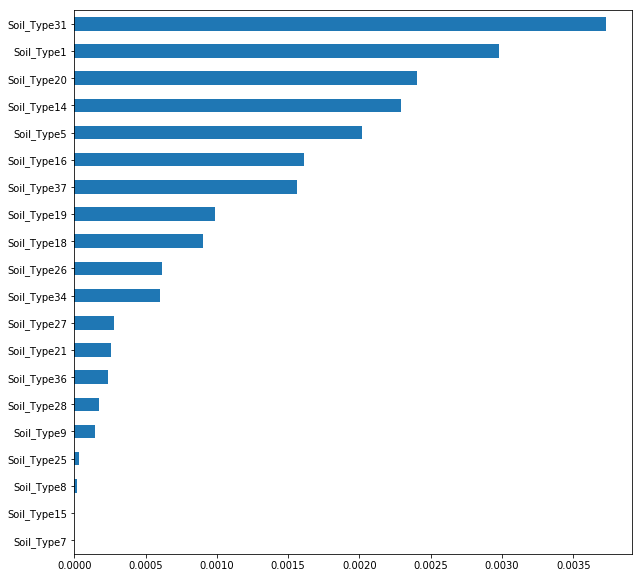

In [0]:
model = ExtraTreesClassifier() #n_estimators is not necessary but can be used to improve the number of trees in the forest
model.fit(q,t)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization

plt.figure(figsize=(10,10))
feat_importances=pd.Series(model.feature_importances_, index=q.columns)
print(feat_importances)
feat_importances.nsmallest(20).plot(kind='barh')
plt.show()

<BarContainer object of 4 artists>

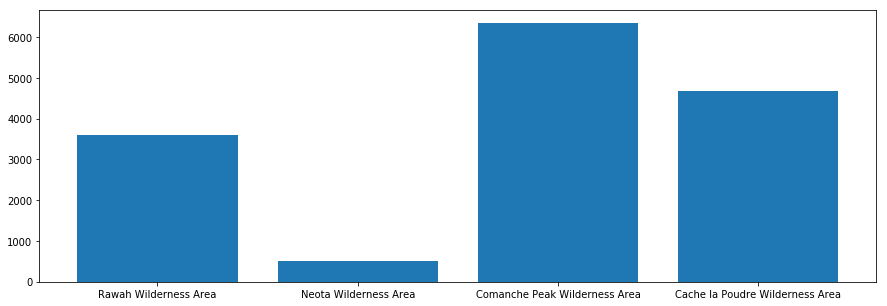

In [0]:
plt.figure(figsize=(15,5))
wd=[]

wd.append((df['Wilderness_Area1']==1).sum())
wd.append((df['Wilderness_Area2']==1).sum())
wd.append((df['Wilderness_Area3']==1).sum())
wd.append((df['Wilderness_Area4']==1).sum())

wd1=['Rawah Wilderness Area','Neota Wilderness Area','Comanche Peak Wilderness Area','Cache la Poudre Wilderness Area']
plt.bar(wd1,wd)


In [0]:
soil=df.drop(['Id','Elevation',	'Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points','Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4','Cover_Type'],axis='columns')
a=list(soil.columns)

In [0]:
b=[]
for i in soil:
  p=(df[i]==1).sum()
  b.append(p)



In [0]:
print(a[6],a[7],a[14],a[24])

Soil_Type7 Soil_Type8 Soil_Type15 Soil_Type25


In [0]:
print(b[6],b[7],b[14],b[24])

0 1 0 1


In [0]:
b

<BarContainer object of 40 artists>

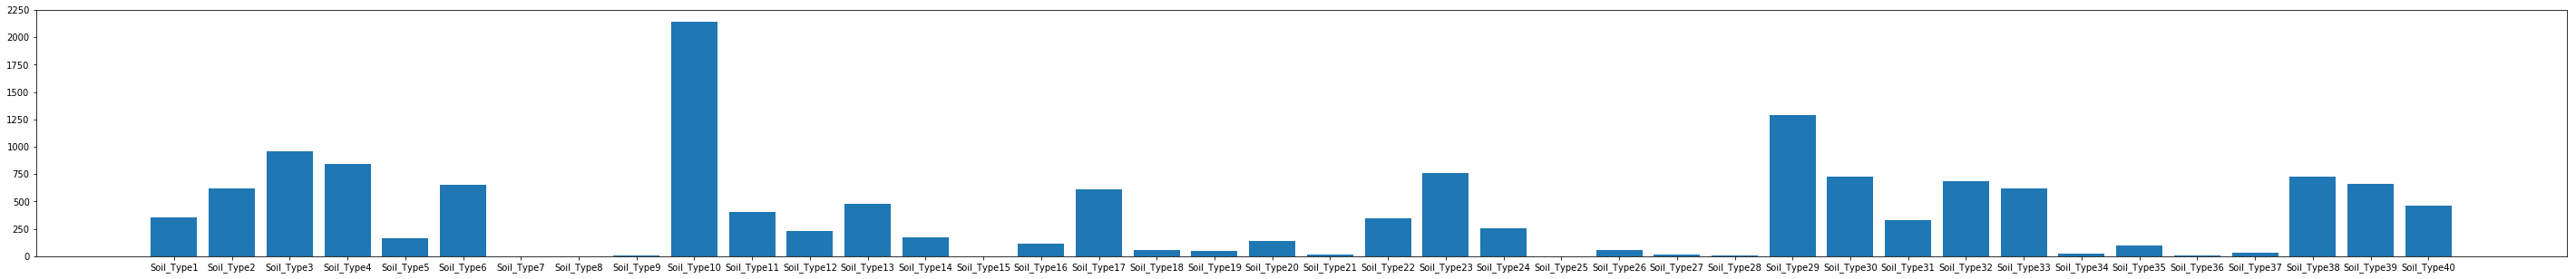

In [0]:
plt.figure(figsize=(50,5))
plt.bar(a,b)

<BarContainer object of 2 artists>

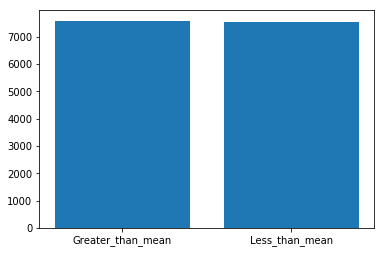

In [0]:
import math
ele_mean=math.ceil(df.Elevation.mean())
d=(df['Elevation']>ele_mean).value_counts()

c=['Greater_than_mean','Less_than_mean']
y=list(d)
plt.bar(c,y)

The predictive model is distributed equally. If not some changes are needed to be made

Refer

https://towardsdatascience.com/machine-learning-multiclass-classification-with-imbalanced-data-set-29f6a177c1a

In [0]:
df['Cover_Type'].value_counts()

7    2160
6    2160
5    2160
4    2160
3    2160
2    2160
1    2160
Name: Cover_Type, dtype: int64

NORMALISING THE DATA

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
import numpy as np
from sklearn import preprocessing
min_max_scaler=preprocessing.MinMaxScaler(feature_range=(0,1))
h=df.iloc[:, 1:11]

for i in h.columns:
  tempx=np.array(df[i])
  temp2x=np.reshape(tempx,(-1,1))
  scaled=min_max_scaler.fit_transform(temp2x)
  
  df[i]=scaled



In [0]:
df

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,0.369084,0.141667,0.057692,0.192107,0.208571,0.074020,0.870079,0.858065,0.596774,...,0,0,0,0,0,0,0,0,0,5
1,2,0.366062,0.155556,0.038462,0.157856,0.200000,0.056604,0.866142,0.877419,0.608871,...,0,0,0,0,0,0,0,0,0,5
2,3,0.473817,0.386111,0.173077,0.199553,0.301429,0.461538,0.921260,0.896774,0.544355,...,0,0,0,0,0,0,0,0,0,2
3,4,0.464250,0.430556,0.346154,0.180194,0.377143,0.448476,0.937008,0.896774,0.491935,...,0,0,0,0,0,0,0,0,0,2
4,5,0.368580,0.125000,0.038462,0.113924,0.207143,0.056749,0.866142,0.870968,0.604839,...,0,0,0,0,0,0,0,0,0,5
5,6,0.360524,0.366667,0.115385,0.223380,0.187143,0.009724,0.905512,0.890323,0.564516,...,0,0,0,0,0,0,0,0,0,2
6,7,0.374119,0.125000,0.134615,0.201042,0.215714,0.091872,0.874016,0.812903,0.556452,...,0,0,0,0,0,0,0,0,0,5
7,8,0.373615,0.136111,0.076923,0.174237,0.218571,0.083164,0.874016,0.845161,0.580645,...,0,0,0,0,0,0,0,0,0,5
8,9,0.379658,0.125000,0.173077,0.178704,0.288571,0.096662,0.877953,0.787097,0.536290,...,0,0,0,0,0,0,0,0,0,5
9,10,0.377140,0.163889,0.192308,0.183917,0.224286,0.092308,0.897638,0.774194,0.500000,...,0,0,0,0,0,0,0,0,0,5


# **MACHINE LEARNING MODELS**

In [0]:
names=['Logistic_Regression','Decision_Tree','SVM','Random_Forest','KNN','Naive_Bayes']
final_scores=[]

## Logistic Regression



In [0]:
X=df.drop(['Cover_Type','Id','Soil_Type7','Soil_Type8','Soil_Type15','Soil_Type25'],axis='columns')
y=df['Cover_Type']

In [0]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [0]:
from sklearn.model_selection import train_test_split
scores=[]
for i in range(0,50):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
  model.fit(X_train,y_train)
  f=model.score(X_test,y_test)
  scores.append(f)cros



In [0]:
print(len(scores))

50


In [0]:
final_scores.append(sum(scores)/len(scores))
print(sum(scores)/len(scores))

0.6656613756613757


In [0]:
y_pred=model.predict(X_test)         #To test the accuracy of the model even more better we use a confusion_matrix
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)  
cm

array([[264,  91,   0,   0,  27,   6,  39],
       [105, 210,  10,   0,  93,  24,   4],
       [  0,   0, 198,  71,  18, 156,   0],
       [  0,   0,  29, 369,   0,  34,   0],
       [  5,  52,  32,   0, 303,  20,   0],
       [  0,  19,  86,  54,  35, 255,   0],
       [ 67,   3,   3,   0,   2,   0, 340]])

In [0]:
print(y_test)

Text(69.0, 0.5, 'Truth')

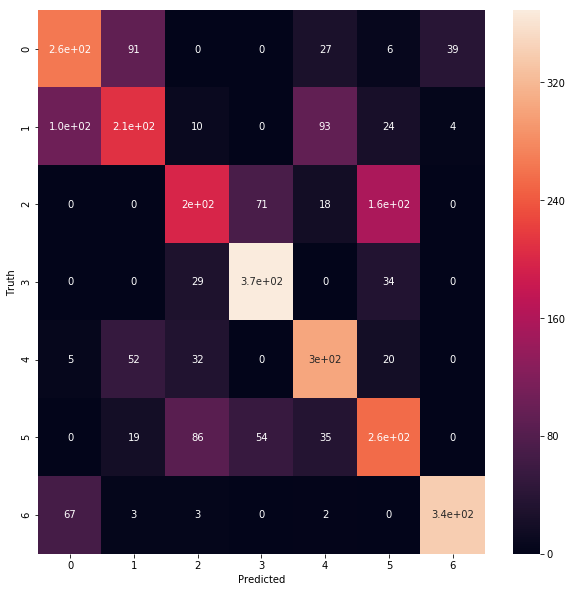

In [0]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Decision Tree

Decision tree classifier is a systematic approach for multiclass classification. It poses a set of questions to the dataset (related to its attributes/features). The decision tree classification algorithm can be visualized on a binary tree. On the root and each of the internal nodes, a question is posed and the data on that node is further split into separate records that have different characteristics. The leaves of the tree refer to the classes in which the dataset is split. 

In [0]:
from sklearn import tree
model2=tree.DecisionTreeClassifier()

In [0]:
dt_scores=[]
for i in range(0,50):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
  model2.fit(X_train,y_train)
  temp=model2.score(X_test,y_test)
  dt_scores.append(temp)
  




In [0]:
print(len(dt_scores))

50


In [0]:
final_scores.append(sum(dt_scores)/len(dt_scores))
print(sum(dt_scores)/len(dt_scores))

0.7847089947089947


In [0]:
y_pred2=model2.predict(X_test)
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred2)
cm


array([[255, 100,   1,   0,   6,   1,  37],
       [ 95, 296,   8,   0,  41,  10,   2],
       [  0,   9, 320,  23,   6,  81,   0],
       [  0,   0,  22, 406,   0,  18,   0],
       [  7,  33,   7,   0, 357,  10,   0],
       [  2,  17,  72,   7,   7, 334,   0],
       [ 47,   9,   0,   0,   1,   0, 377]])

Text(69.0, 0.5, 'Truth')

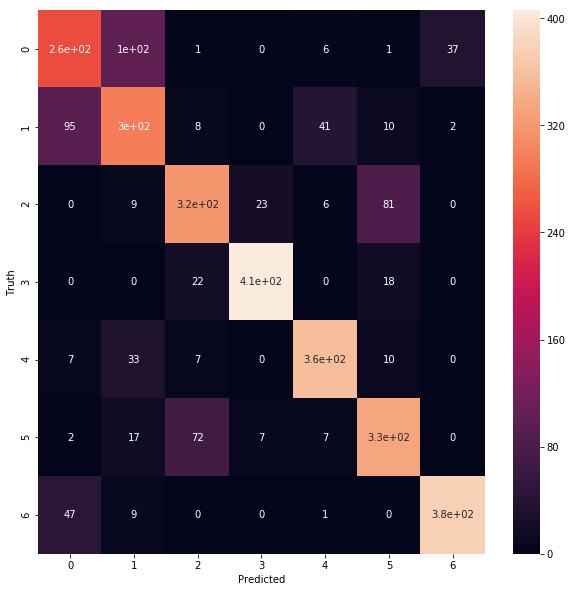

In [0]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## SVM

SVM (Support vector machine) is an efficient classification method when the feature vector is high dimensional. In sci-kit learn, we can specify the the kernel function

In [0]:
from sklearn.svm import SVC
model3=SVC()

In [0]:
svm_scores=[]
for i in range(0,50):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
  model3.fit(X_train,y_train)
  temp=model3.score(X_test,y_test)
  svm_scores.append(temp)
  

In [0]:
print(len(svm_scores))

11


In [0]:
final_scores.append(sum(svm_scores)/len(svm_scores))
print(sum(svm_scores)/len(svm_scores))

0.6077140452140454


## Random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()


In [0]:
rf_scores=[]
for i in range(0,50):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
  rf.fit(X_train,y_train)
  temp=rf.score(X_test,y_test)
  rf_scores.append(temp)

In [0]:
print(len(rf_scores))

50


In [0]:
print(rf_scores)

[0.8224206349206349, 0.8181216931216931, 0.8296957671957672, 0.8194444444444444, 0.8181216931216931, 0.8363095238095238, 0.8197751322751323, 0.8323412698412699, 0.83994708994709, 0.816468253968254, 0.8283730158730159, 0.8336640211640212, 0.8290343915343915, 0.8306878306878307, 0.8244047619047619, 0.8313492063492064, 0.8154761904761905, 0.8452380952380952, 0.8363095238095238, 0.841931216931217, 0.8290343915343915, 0.832010582010582, 0.826058201058201, 0.8343253968253969, 0.8267195767195767, 0.8373015873015873, 0.8131613756613757, 0.8336640211640212, 0.8369708994708994, 0.8287037037037037, 0.8412698412698413, 0.8306878306878307, 0.8240740740740741, 0.8346560846560847, 0.8356481481481481, 0.8363095238095238, 0.8323412698412699, 0.826058201058201, 0.8349867724867724, 0.8201058201058201, 0.8369708994708994, 0.8316798941798942, 0.8177910052910053, 0.8194444444444444, 0.8257275132275133, 0.8287037037037037, 0.8409391534391535, 0.8412698412698413, 0.8310185185185185, 0.8366402116402116]


In [0]:
final_scores.append(sum(rf_scores)/len(rf_scores))
print(sum(rf_scores)/len(rf_scores))

0.8342724867724869


In [0]:
y_pred3=model2.predict(X_test)
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred3)
cm

array([[392,  22,   0,   0,   0,   0,   6],
       [ 22, 412,   1,   0,  10,   3,   0],
       [  0,   1, 403,   8,   0,  20,   0],
       [  0,   0,   4, 421,   0,   3,   0],
       [  3,   1,   1,   0, 427,   1,   0],
       [  0,   7,  21,   1,   1, 395,   0],
       [ 10,   3,   0,   0,   1,   0, 424]])

Text(69.0, 0.5, 'Truth')

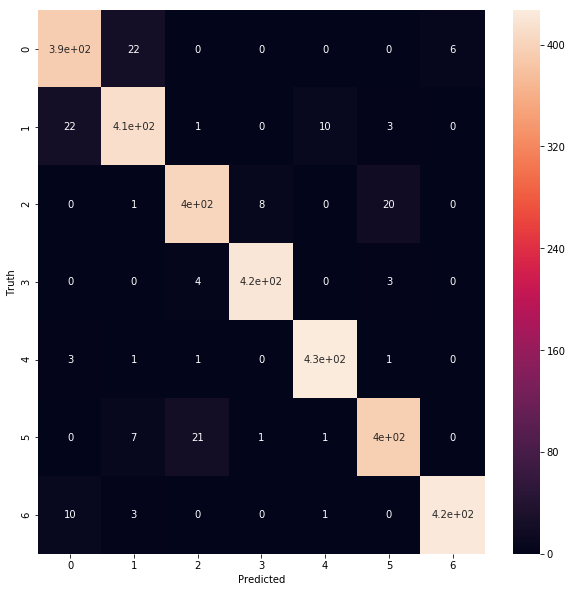

In [0]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## KNN

KNN or k-nearest neighbours is the simplest classification algorithm. This classification algorithm does not depend on the structure of the data. Whenever a new example is encountered, its k nearest neighbours from the training data are examined. Distance between two examples can be the euclidean distance between their feature vectors. The majority class among the k nearest neighbours is taken to be the class for the encountered example.

In [0]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 1)

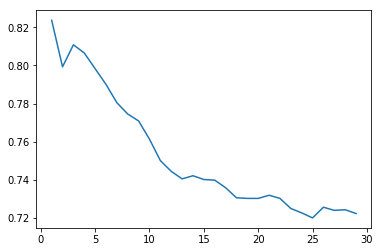

In [0]:
t=[]
num=[]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
for i in range(1,30):
  num.append(i)
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  t.append(knn.score(X_test,y_test))
  
plt.plot(num,t)

In [0]:
knn_scores=[]
for i in range(0,50):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
  knn.fit(X_train,y_train)
  temp=knn.score(X_test,y_test)
  knn_scores.append(temp)

In [0]:
print(len(knn_scores))

50


In [0]:
final_scores.append(sum(knn_scores)/len(knn_scores))
print(sum(knn_scores)/len(knn_scores))

0.7246957671957673


## NAIVE BAYES CLASSIFIER

In [0]:
from sklearn.naive_bayes import GaussianNB 
gnb=GaussianNB()

In [0]:
gnb_scores=[]
for i in range(0,50):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
  gnb.fit(X_train,y_train)
  temp=gnb.score(X_test,y_test)
  gnb_scores.append(temp)


In [0]:
print(len(gnb_scores))

50


In [0]:
final_scores.append(sum(gnb_scores)/len(gnb_scores))
print(sum(gnb_scores)/len(gnb_scores))

0.46912037037037035


## COMPARING SCORES OF VARIOUS MODELS

<BarContainer object of 6 artists>

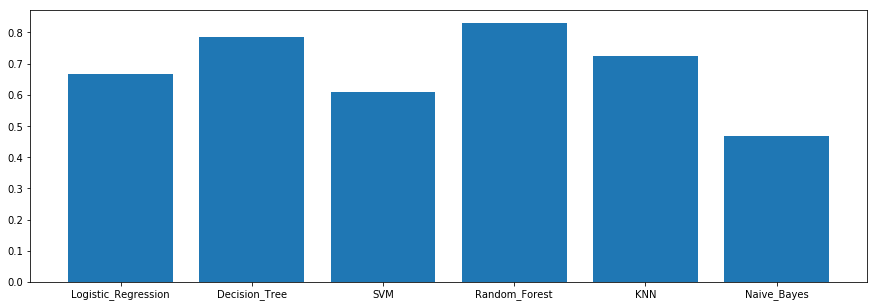

In [0]:
plt.figure(figsize=(15,5))
plt.bar(names,final_scores)

# **USING CROSS VALIDATION**

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
cross_names=[LogisticRegression(),DecisionTreeClassifier(),SVC(),RandomForestClassifier(),KNeighborsClassifier(n_neighbors = 1),GaussianNB()]
cs=[]
final_cross_scores=[]
for i in cross_names:
  u=cross_val_score(i,X_train,y_train,cv=10,scoring='accuracy')
  o=sum(u)/len(u)
  final_cross_scores.append(o)
 
  
  

In [0]:
print(final_cross_scores)

[0.6660138407464988, 0.7783539715153855, 0.6113682122080635, 0.8299472110402526, 0.8150647473746438, 0.47643852332672665]


<BarContainer object of 6 artists>

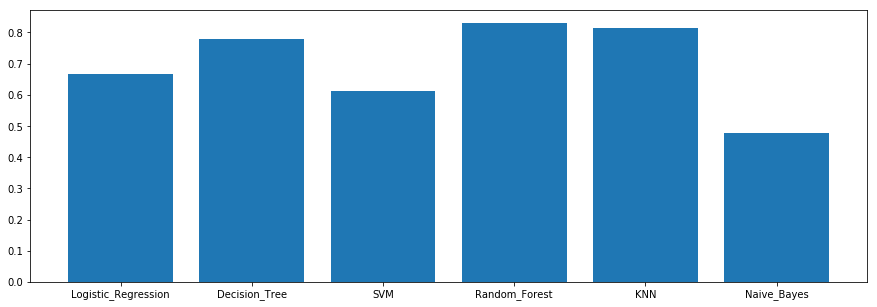

In [0]:
plt.figure(figsize=(15,5))
plt.bar(names,final_cross_scores)

## We observe that **random forest** gives the highest accuracy

CHECK THE BEST VALUE OF ESTIMATORS

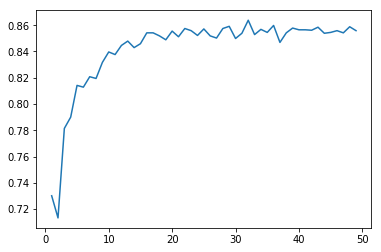

In [0]:
t=[]
num=[]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
for i in range(1,50):
  num.append(i)
  rf_check=RandomForestClassifier(n_estimators=i)
  rf_check.fit(X_train,y_train)
  t.append(rf_check.score(X_test,y_test))

plt.plot(num,t)

In [0]:
x=max(t)
print(x)
print(t.index(x)+1)

0.8637566137566137
32


CHECK THE BEST MAX_DEPTH VALUE

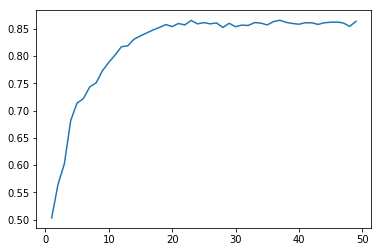

In [0]:
t=[]
num=[]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
for i in range(1,50):
  num.append(i)
  rf_check=RandomForestClassifier(n_estimators=48,max_depth=i)
  rf_check.fit(X_train,y_train)
  t.append(rf_check.score(X_test,y_test))

plt.plot(num,t)

In [0]:
x=max(t)
print(x)
print(t.index(x)+1)

0.8657407407407407
37


CHECK THE BEST MIN_SAMPLES_SPLIT

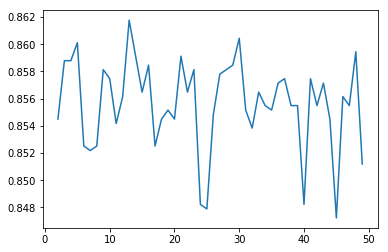

In [0]:
t=[]
num=[]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
for i in range(2,50):
  num.append(i)
  rf_check=RandomForestClassifier(n_estimators=32,max_depth=37,min_samples_split=2)
  rf_check.fit(X_train,y_train)
  t.append(rf_check.score(X_test,y_test))

plt.plot(num,t)

In [0]:
x=max(t)
print(x)
print(t.index(x)+1)

0.8617724867724867
12


We observe that a random forest classifier with n_estimators around 32 a max_depth value of aroung 37 and min_max_split of around 12 mayh give the best accuracy

In [0]:
from sklearn.ensemble import RandomForestClassifier
choose_rf=RandomForestClassifier(n_estimators=30,max_depth=40,min_samples_split=12,n_jobs=-1,random_state=0)

In [0]:
choose_rf_scores=[]
for i in range(0,50):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
  choose_rf.fit(X_train,y_train)
  temp=choose_rf.score(X_test,y_test)
  choose_rf_scores.append(temp)

In [0]:
print(len(choose_rf_scores))

50


In [0]:
print(sum(choose_rf_scores)/len(choose_rf_scores))

0.8409391534391533


# **SAVING OUR TRAINED MODEL**

In [0]:
import pickle
with open('myforest','wb') as f:
  pickle.dump(choose_rf,f)


In [0]:
import pickle
with open('myforest','rb') as fr:
  my_model=pickle.load(fr)

In [0]:
my_model.score(X_test,y_test)

0.855489417989418

In [0]:
X_train.shape

(12096, 50)

TESTING DATA

In [0]:
test_df=pd.read_csv('/content/test.csv')
test_df

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0
5,15126,2699,21,18,30,3,2890,206,200,127,...,0,0,0,0,0,0,0,0,0,0
6,15127,2699,15,17,30,6,2860,202,202,133,...,0,0,0,0,0,0,0,0,0,0
7,15128,2696,10,16,30,6,2830,202,207,140,...,0,0,0,0,0,0,0,0,0,0
8,15129,2696,17,13,30,6,2770,208,211,138,...,0,0,0,0,0,0,0,0,0,0
9,15130,2693,14,15,30,7,2741,205,209,138,...,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn import preprocessing
min_max_scaler=preprocessing.MinMaxScaler(feature_range=(0,1))
h=test_df.iloc[:, 1:11]

for i in h.columns:
  tempx=np.array(test_df[i])
  temp2x=np.reshape(tempx,(-1,1))
  scaled=min_max_scaler.fit_transform(temp2x)
  
  test_df[i]=scaled

In [0]:
test_df

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,0.410705,0.983333,0.212121,0.000000,0.223514,0.377125,0.771654,0.842520,0.614173,...,0,0,0,0,0,0,0,0,0,0
1,15122,0.412206,0.000000,0.196970,0.000000,0.223514,0.372910,0.791339,0.850394,0.598425,...,0,0,0,0,0,0,0,0,0,0
2,15123,0.427214,0.044444,0.227273,0.000000,0.223514,0.418716,0.811024,0.818898,0.539370,...,0,0,0,0,0,0,0,0,0,0
3,15124,0.425213,0.066667,0.257576,0.000000,0.223514,0.414500,0.818898,0.791339,0.492126,...,0,0,0,0,0,0,0,0,0,0
4,15125,0.423712,0.080556,0.287879,0.000000,0.223514,0.410285,0.826772,0.767717,0.452756,...,0,0,0,0,0,0,0,0,0,0
5,15126,0.420210,0.058333,0.272727,0.021475,0.227390,0.406070,0.811024,0.787402,0.500000,...,0,0,0,0,0,0,0,0,0,0
6,15127,0.420210,0.041667,0.257576,0.021475,0.231266,0.401855,0.795276,0.795276,0.523622,...,0,0,0,0,0,0,0,0,0,0
7,15128,0.418709,0.027778,0.242424,0.021475,0.231266,0.397639,0.795276,0.814961,0.551181,...,0,0,0,0,0,0,0,0,0,0
8,15129,0.418709,0.047222,0.196970,0.021475,0.231266,0.389209,0.818898,0.830709,0.543307,...,0,0,0,0,0,0,0,0,0,0
9,15130,0.417209,0.038889,0.227273,0.021475,0.232558,0.385134,0.807087,0.822835,0.543307,...,0,0,0,0,0,0,0,0,0,0


In [0]:
soil2=test_df.drop(['Id','Elevation',	'Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points','Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4'],axis='columns')
a2=list(soil2.columns)

In [0]:
b2=[]
for i in soil2:
  p=(test_df[i]==1).sum()
  b2.append(p)



<BarContainer object of 40 artists>

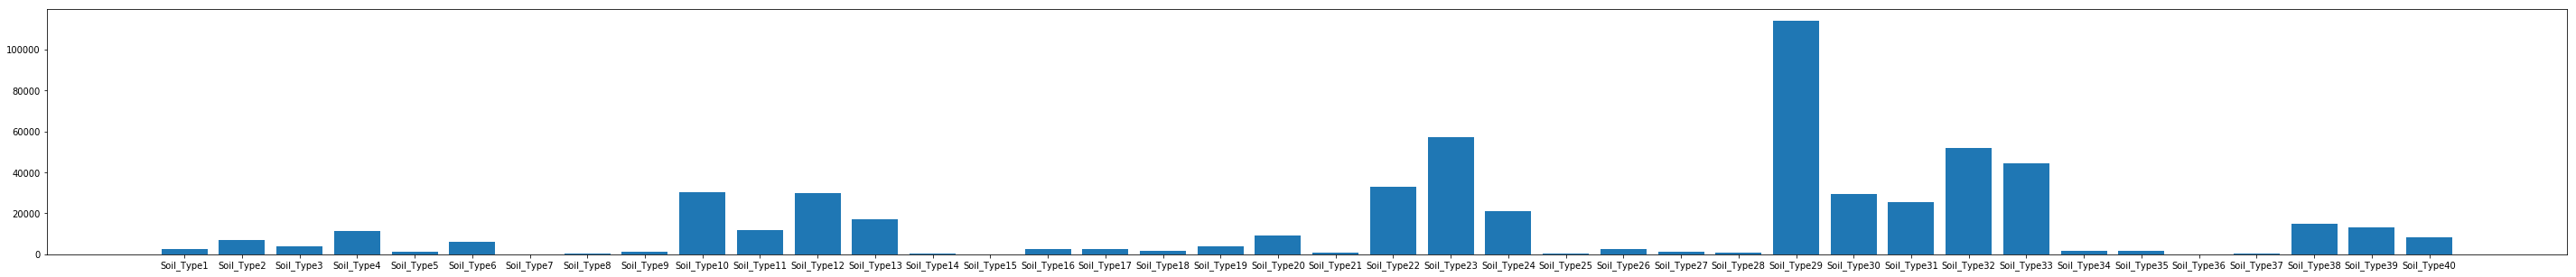

In [0]:
plt.figure(figsize=(50,5))
plt.bar(a2,b2)

In [0]:
X_test=test_df.drop(['Id','Soil_Type7','Soil_Type8','Soil_Type15','Soil_Type25'],axis='columns')
Id=test_df['Id']

In [0]:
print(type(X_test))
X_test.shape

<class 'pandas.core.frame.DataFrame'>


(565892, 50)

In [0]:
predict=my_model.predict(X_test)

In [0]:
print(predict)

[2 1 1 ... 3 3 3]


In [0]:
print(type(predict))

<class 'numpy.ndarray'>


In [0]:
final_predict=pd.DataFrame(predict)

In [0]:
import pandas as pd
final=pd.concat([Id,final_predict],axis='columns')

In [0]:
final.columns=['Id','Cover_Type']

In [0]:
final

In [0]:
import csv
with open('covertypepredict3.csv', 'wb') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)

In [0]:
import numpy as np
import pandas as pd
prediction = pd.DataFrame(final, columns=['Id','Cover_Type']).to_csv('covertypepredict3.csv')

In [0]:
b=pd.read_csv('/content/covertypepredict3.csv')
b

,Unnamed: 0,Id,Cover_Type
0,0,15121,2
1,1,15122,1
2,2,15123,1
3,3,15124,1
4,4,15125,2
5,5,15126,1
6,6,15127,2
7,7,15128,2
8,8,15129,2
9,9,15130,2


In [0]:
new_df=pd.read_csv('/content/train.csv')
new_df

In [0]:
from sklearn.preprocessing import scale

import numpy as np

h=df.iloc[:, 1:11]

for i in h.columns:
  #tempx=np.array(df[i])
  #temp2x=np.reshape(tempx,(-1,1))
  #scaled=min_max_scaler.fit_transform(temp2x)
  scaled=preprocessing.scale(new_df[i])
  new_df[i]=scaled


In [0]:
new_df

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,-0.367095,-0.959980,-1.597132,0.146639,-0.834074,-0.908681,0.271454,0.571653,0.281259,...,0,0,0,0,0,0,0,0,0,5
1,2,-0.381461,-0.914559,-1.715424,-0.072337,-0.932054,-0.999246,0.238732,0.703225,0.346627,...,0,0,0,0,0,0,0,0,0,5
2,3,0.130912,-0.160577,-0.887379,0.194243,0.227369,1.106379,0.696843,0.834797,-0.002005,...,0,0,0,0,0,0,0,0,0,2
3,4,0.085421,-0.015231,0.177250,0.070474,1.092853,1.038455,0.827731,0.834797,-0.285268,...,0,0,0,0,0,0,0,0,0,2
4,5,-0.369489,-1.014485,-1.715424,-0.353198,-0.850404,-0.998491,0.238732,0.659368,0.324838,...,0,0,0,0,0,0,0,0,0,5
5,6,-0.407798,-0.224166,-1.242255,0.346574,-1.079023,-1.243015,0.565954,0.790940,0.106943,...,0,0,0,0,0,0,0,0,0,2
6,7,-0.343152,-1.014485,-1.123963,0.203764,-0.752425,-0.815853,0.304176,0.264652,0.063364,...,0,0,0,0,0,0,0,0,0,5
7,8,-0.345547,-0.978148,-1.478839,0.032391,-0.719765,-0.861135,0.304176,0.483939,0.194101,...,0,0,0,0,0,0,0,0,0,5
8,9,-0.316816,-1.014485,-0.887379,0.060953,0.080400,-0.790947,0.336898,0.089223,-0.045584,...,0,0,0,0,0,0,0,0,0,5
9,10,-0.328787,-0.887307,-0.769087,0.094276,-0.654445,-0.813589,0.500509,0.001508,-0.241689,...,0,0,0,0,0,0,0,0,0,5


In [0]:
X=new_df.drop(['Cover_Type','Id','Soil_Type7','Soil_Type8','Soil_Type15','Soil_Type25'],axis='columns')
y=new_df['Cover_Type']

In [0]:
choose_rf_scores=[]
for i in range(0,50):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
  choose_rf.fit(X_train,y_train)
  temp=choose_rf.score(X_test,y_test)
  choose_rf_scores.append(temp)

In [0]:
print(len(choose_rf_scores))

50


In [0]:
print(sum(choose_rf_scores)/len(choose_rf_scores))

0.8413690476190477


In [1]:
predict=my_model.predict(X_test)

NameError: ignored